In [9]:
# ===============================================================
# 1) IMPORT LIBRARIES
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import shap
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [10]:
# ===============================================================
# 1) LOAD DATASETS
# ===============================================================

from pathlib import Path
OUT = Path.home() / "ml_outputs"
print(OUT)

data = pd.read_csv(OUT / 'Cleaned_Features_for_ML.csv', index_col=0, parse_dates=True)

C:\Users\dax_a\ml_outputs


In [11]:
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3970 entries, 2010-07-29 to 2025-11-03
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   S&P500                             3970 non-null   float64
 1   NASDAQ                             3970 non-null   float64
 2   DowJones                           3970 non-null   float64
 3   CAC40                              3970 non-null   float64
 4   DAX                                3970 non-null   float64
 5   FTSE100                            3970 non-null   float64
 6   Nikkei225                          3970 non-null   float64
 7   HangSeng                           3970 non-null   float64
 8   MSCIWorld                          3970 non-null   float64
 9   US10Y                              3970 non-null   float64
 10  US2Y                               3970 non-null   float64
 11  TLT                                397

In [23]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

#correction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier, KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [24]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
pd.set_option('display.precision', 3)
data.describe()

,S&P500,NASDAQ,DowJones,CAC40,DAX,FTSE100,Nikkei225,HangSeng,MSCIWorld,US10Y,...,OECD_CPI_2015idx_USA,OECD_Unemp_rate_pct_USA,target_index,Volatility_20d,MA20,MA50,Momentum,RSI,Direction,Return
count,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,3.970e+03,...,3970.000,3970.000,3.970e+03,3970.000,3970.000,3.970e+03,3970.000,3970.000,3970.000,3.970e+03
mean,5.167e-04,6.738e-04,4.324e-04,2.700e-04,4.109e-04,1.971e-04,5.034e-04,1.371e-04,4.451e-04,4.621e-04,...,109.141,5.592,1.044e-03,0.016,0.001,1.029e-03,NaN,49.855,0.513,1.044e-03
std,1.069e-02,1.269e-02,1.028e-02,1.200e-02,1.207e-02,9.545e-03,1.295e-02,1.286e-02,1.009e-02,2.794e-02,...,13.014,2.117,1.746e-02,0.007,0.004,2.327e-03,NaN,4.995,0.500,1.746e-02
min,-1.198e-01,-1.232e-01,-1.293e-01,-1.228e-01,-1.224e-01,-1.087e-01,-1.240e-01,-1.322e-01,-1.138e-01,-2.932e-01,...,91.644,3.400,-1.286e-01,0.004,-0.014,-7.759e-03,-inf,27.813,0.000,-1.286e-01
25%,-3.523e-03,-4.482e-03,-3.546e-03,-5.354e-03,-4.890e-03,-4.206e-03,-5.630e-03,-6.350e-03,-2.961e-03,-1.249e-02,...,99.386,3.900,-6.925e-03,0.011,-0.001,-4.015e-04,-1.938,46.804,0.000,-6.925e-03
50%,3.815e-04,7.923e-04,3.708e-04,3.813e-04,5.283e-04,2.657e-04,4.104e-05,0.000e+00,0.000e+00,0.000e+00,...,105.286,4.800,4.293e-04,0.014,0.001,1.136e-03,-1.000,50.016,1.000,4.293e-04
75%,5.407e-03,6.979e-03,5.057e-03,6.325e-03,6.440e-03,4.912e-03,7.082e-03,6.617e-03,4.402e-03,1.257e-02,...,118.483,7.200,9.747e-03,0.019,0.004,2.563e-03,0.029,52.998,1.000,9.747e-03
max,9.515e-02,1.216e-01,1.137e-01,8.389e-02,1.098e-01,9.053e-02,1.023e-01,9.082e-02,9.096e-02,4.990e-01,...,136.439,14.800,1.533e-01,0.068,0.015,8.217e-03,inf,75.575,1.000,1.533e-01


In [30]:
# ===============================================================
# 9) Train/Test Split
# ===============================================================
features = data.drop(columns=['Apple', 'Return', 'Direction', 'target_index'])
target = data["Return"] 
# Handle infinities and missing values early
features.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# ===============================================================
# 1) Imports
# ===============================================================
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)

# ✅ FIX: Import LogisticRegression and other models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ===============================================================
# 10) Define Models
# ===============================================================
models = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('SVC', SVC(kernel='rbf', probability=True, random_state=42)),
    ('XGB', XGBClassifier(eval_metric='logloss', random_state=42))
]

LogReg          | Accuracy: 0.515 | F1: 0.560 | AUC: 0.510
RandomForest    | Accuracy: 0.485 | F1: 0.539 | AUC: 0.474
SVC             | Accuracy: 0.513 | F1: 0.502 | AUC: 0.473
XGB             | Accuracy: 0.486 | F1: 0.496 | AUC: 0.507

Performance Summary:



,Accuracy,F1,AUC
Model,,,
LogReg,0.515,0.560,0.510
XGB,0.486,0.496,0.507
RandomForest,0.485,0.539,0.474
SVC,0.513,0.502,0.473


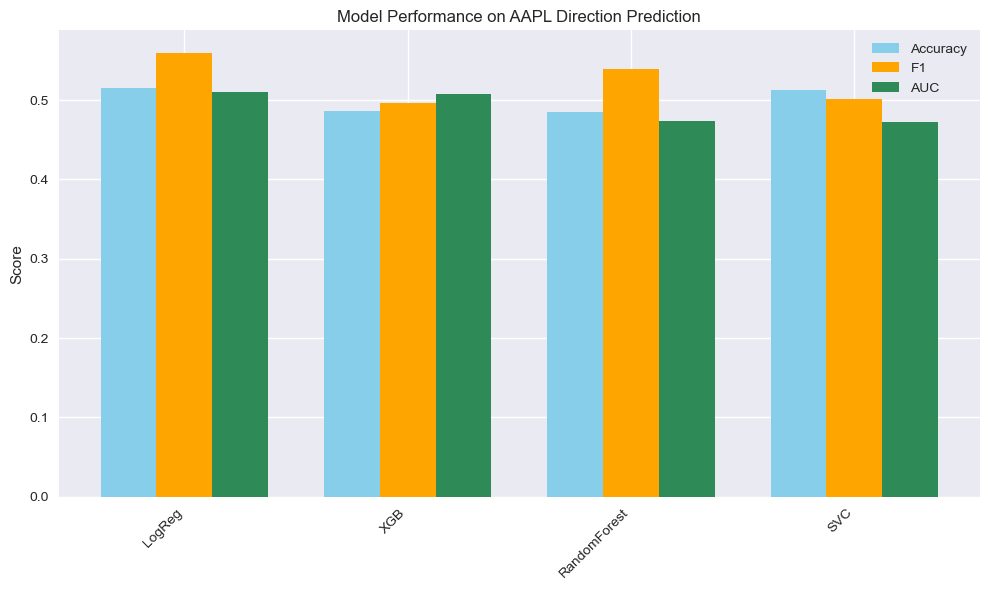


Confusion Matrix (XGB):
[[185 192]
 [216 201]]

Classification Report (XGB):
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       377
           1       0.51      0.48      0.50       417

    accuracy                           0.49       794
   macro avg       0.49      0.49      0.49       794
weighted avg       0.49      0.49      0.49       794



In [38]:
## ===============================================================
# 11) Train & Evaluate Each Model — Robust Version
# ===============================================================
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

results = []
for name, model in models:
    pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    # Fit and predict
    pipe.fit(X_train_scaled, Y_train)
    y_pred = pipe.predict(X_test_scaled)
    
    # Handle models that don’t have predict_proba()
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(pipe.named_steps["model"], "decision_function"):
        scores = pipe.decision_function(X_test_scaled)
        # Normalize decision function output to [0,1]
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        # Fallback: use predicted class as pseudo-probability
        y_proba = y_pred.astype(float)
    
    # Compute metrics
    acc = accuracy_score(Y_test, y_pred)
    f1  = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_proba)
    
    results.append((name, acc, f1, auc))
    print(f"{name:15s} | Accuracy: {acc:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")

# ===============================================================
# 12) Summary Table
# ===============================================================
results_df = (
    pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1', 'AUC'])
      .set_index('Model')
      .sort_values(by='AUC', ascending=False)
)

print("\nPerformance Summary:\n")
display(results_df.style.background_gradient(cmap='coolwarm').format("{:.3f}"))

# ===============================================================
# 13) Visualization — Model Comparison
# ===============================================================
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.25
ind = np.arange(len(results_df))

ax.bar(ind - bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
ax.bar(ind,           results_df['F1'],        width=bar_width, label='F1', color='orange')
ax.bar(ind + bar_width, results_df['AUC'],     width=bar_width, label='AUC', color='seagreen')

ax.set_xticks(ind)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.set_ylabel("Score")
ax.set_title("Model Performance on AAPL Direction Prediction")
ax.legend()
plt.tight_layout()
plt.show()

# ===============================================================
# 14) Confusion Matrix for Best Model (Example: XGB)
# ===============================================================
best_model = XGBClassifier(eval_metric='logloss', random_state=42)
pipe_best = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", best_model)
])
pipe_best.fit(X_train_scaled, Y_train)
y_pred_best = pipe_best.predict(X_test_scaled)

print("\nConfusion Matrix (XGB):")
print(confusion_matrix(Y_test, y_pred_best))
print("\nClassification Report (XGB):")
print(classification_report(Y_test, y_pred_best))


In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Choose columns
target_cont = 'Return'     # continuous
target_bin  = 'Direction'     # binary 0/1
feature_cols = [c for c in data.columns if c not in [target_cont, target_bin]]

# Chronological split (no shuffle)
test_size = 0.2
split_idx = int(len(data)*(1-test_size))

train_df = data.iloc[:split_idx].copy()
test_df  = data.iloc[split_idx:].copy()

Y_train_cont = train_df[target_cont]
Y_test_cont  = test_df[target_cont]
Y_train_bin  = train_df[target_bin]
Y_test_bin   = test_df[target_bin]

X_train = train_df[feature_cols]
X_test  = test_df[feature_cols]

# (Helper) simple evaluation for binary predictions
def evaluate_direction(y_true, y_prob, thr=0.5, name="Model"):
    y_hat = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_hat)
    f1  = f1_score(y_true, y_hat)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = np.nan
    print(f"{name}: Acc={acc:.3f}  F1={f1:.3f}  AUC={auc:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_true, y_hat))
    print(classification_report(y_true, y_hat, digits=3))
    return acc, f1, auc

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

# ===============================================================
# 1A) Align & Clean Exogenous Variables
# ===============================================================
# Make sure columns are identical and same order
X_test = X_test[X_train.columns]

# Replace inf/-inf with NaN, then fill NaN with column median (safe for regressors)
X_train_clean = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test_clean  = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())

# Clean dependent variable (continuous target)
Y_train_cont_clean = pd.Series(Y_train_cont).replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')
Y_test_cont_clean  = pd.Series(Y_test_cont).replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill')

# ===============================================================
# 1B) Fit SARIMAX on the continuous target with exogenous variables
# ===============================================================
order = (1, 1, 0)  # (p,d,q)
sarimax = SARIMAX(
    endog=Y_train_cont_clean,
    exog=X_train_clean,
    order=order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_fit = sarimax.fit(disp=False)

# ===============================================================
# 1C) In-sample fitted & out-of-sample forecast (continuous)
# ===============================================================
fitted_cont = sarimax_fit.fittedvalues
pred_cont   = sarimax_fit.predict(
    start=len(Y_train_cont_clean),
    end=len(Y_train_cont_clean) + len(Y_test_cont_clean) - 1,
    exog=X_test_clean
)

# ===============================================================
# 1D) Convert continuous forecasts → directional probabilities
# ===============================================================
pred_dir_prob = (pred_cont - np.nanmin(pred_cont)) / (np.nanmax(pred_cont) - np.nanmin(pred_cont) + 1e-12)
evaluate_direction(Y_test_bin, pred_dir_prob, thr=0.5, name="SARIMAX→Direction")

print("✅ SARIMAX run successful, no missing-data errors.")

SARIMAX→Direction: Acc=0.487  F1=0.081  AUC=0.537
Confusion matrix:
 [[369   8]
 [399  18]]
              precision    recall  f1-score   support

           0      0.480     0.979     0.645       377
           1      0.692     0.043     0.081       417

    accuracy                          0.487       794
   macro avg      0.586     0.511     0.363       794
weighted avg      0.592     0.487     0.349       794

✅ SARIMAX run successful, no missing-data errors.


✅ Scaled features: train (3176, 43), test (794, 43)
✅ Built sequences: X=(3116, 60, 43), y=(3116,)
✅ Built sequences: X=(734, 60, 43), y=(734,)
✅ LSTM model compiled successfully.
Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5058 - loss: 0.7009 - val_accuracy: 0.4687 - val_loss: 0.7171 - learning_rate: 0.0010
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5167 - loss: 0.6944 - val_accuracy: 0.4877 - val_loss: 0.7002 - learning_rate: 0.0010
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5481 - loss: 0.6888 - val_accuracy: 0.4946 - val_loss: 0.7014 - learning_rate: 0.0010
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5648 - loss: 0.6817 - val_accuracy: 0.4659 - val_loss: 0.7508 - learning_rate: 0.0010
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5629 - loss: 0.6815 - val_accuracy: 0.4918 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accura

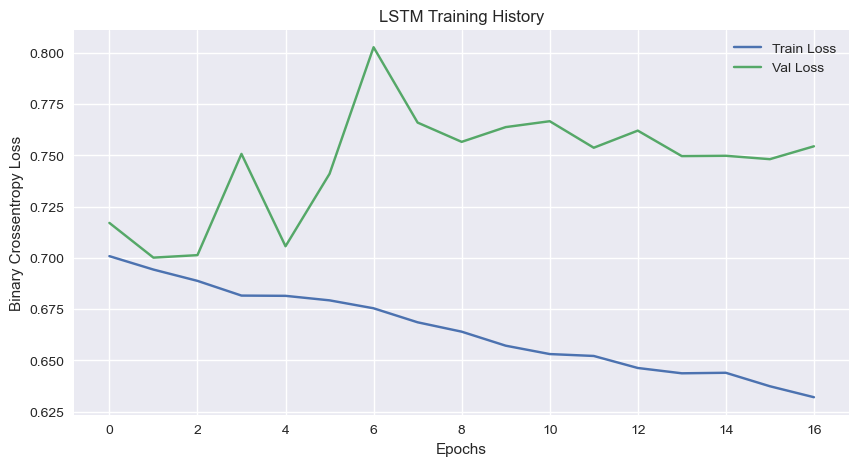

In [43]:
# ===============================================================
# 2) LSTM CLASSIFIER for Direction Prediction – Robust Version
# ===============================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------------------------------
# 2A) Clean & scale features (fit on train only)
# ---------------------------------------------------------------
def clean_and_scale(X_train, X_test):
    """Replace inf/NaN, fill safely, then scale."""
    # Convert to DataFrame if arrays
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
        X_test  = pd.DataFrame(X_test)
    
    # Replace infinities with NaN and fill with median
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test  = X_test.replace([np.inf, -np.inf], np.nan)
    X_train = X_train.fillna(X_train.median())
    X_test  = X_test.fillna(X_train.median())

    # Scale
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)

    print(f"✅ Scaled features: train {X_train_s.shape}, test {X_test_s.shape}")
    return X_train_s, X_test_s

X_train_s, X_test_s = clean_and_scale(X_train, X_test)

# ---------------------------------------------------------------
# 2B) Build time sequences safely
# ---------------------------------------------------------------
def make_sequences(X_mat, y_series, lookback=60):
    """
    Convert tabular data (samples, features) into
    3D (samples, timesteps, features) for LSTM.
    """
    X_mat = np.asarray(X_mat)
    y_series = np.asarray(y_series)
    # Basic validation
    if len(X_mat) <= lookback:
        raise ValueError(f"❌ Not enough samples ({len(X_mat)}) for lookback={lookback}. Reduce lookback.")
    # Build sequences
    X_seq, y_seq = [], []
    for i in range(lookback, len(X_mat)):
        X_seq.append(X_mat[i-lookback:i, :])
        y_seq.append(y_series[i])
    X_seq, y_seq = np.array(X_seq), np.array(y_seq).astype(int)
    print(f"✅ Built sequences: X={X_seq.shape}, y={y_seq.shape}")
    return X_seq, y_seq

# Dynamic lookback (auto-adjust)
lookback = min(60, max(5, len(X_train_s)//3))
Xtr_seq, ytr = make_sequences(X_train_s, Y_train_bin, lookback)
Xte_seq, yte = make_sequences(X_test_s,  Y_test_bin,  lookback)

# ---------------------------------------------------------------
# 2C) Define the LSTM model
# ---------------------------------------------------------------
def build_lstm(neurons=64, dropout=0.2, lr=1e-3):
    tf.keras.utils.set_random_seed(42)  # reproducibility
    model = Sequential([
        LSTM(neurons, input_shape=(Xtr_seq.shape[1], Xtr_seq.shape[2]), dropout=dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    print("✅ LSTM model compiled successfully.")
    return model

model = build_lstm(neurons=64, dropout=0.2, lr=1e-3)

# ---------------------------------------------------------------
# 2D) Train the model
# ---------------------------------------------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=7, factor=0.5, min_lr=1e-5)
]

hist = model.fit(
    Xtr_seq, ytr,
    validation_data=(Xte_seq, yte),
    epochs=200,
    batch_size=32,
    verbose=1,
    shuffle=False,
    callbacks=callbacks
)

# ---------------------------------------------------------------
# 2E) Evaluate: probability → Direction
# ---------------------------------------------------------------
yprob_lstm = model.predict(Xte_seq, verbose=0).ravel()

# Safety: ensure finite probabilities
yprob_lstm = np.nan_to_num(yprob_lstm, nan=0.5, posinf=1.0, neginf=0.0)

evaluate_direction(yte, yprob_lstm, thr=0.5, name="LSTM (Direction)")

# ---------------------------------------------------------------
# 2F) Visualize training history
# ---------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()


In [45]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = y[0:train_size], y[train_size:len(X)]

In [46]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [53]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))


In [54]:
# ===============================================================
# K-Fold Cross-Validation & MSE Evaluation
# ===============================================================
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# Parameters
# ---------------------------------------------------------------
num_folds = 5
seed = 42
scoring = make_scorer(mean_squared_error, greater_is_better=False)

names = []
kfold_results = []
train_results = []
test_results = []

# ---------------------------------------------------------------
# Loop over models
# ---------------------------------------------------------------
for name, model in models:
    print(f"\n🔹 Evaluating model: {name}")
    names.append(name)

    # ✅ Clean input data if necessary (no NaN/Inf)
    X_train_clean = pd.DataFrame(X_train).replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
    X_test_clean  = pd.DataFrame(X_test).replace([np.inf, -np.inf], np.nan).fillna(X_train.median())

    # ✅ K-Fold cross-validation (MSE)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_scores = cross_val_score(
        model,
        X_train_clean,
        Y_train,
        cv=kfold,
        scoring=scoring
    )
    cv_mse_mean = -np.mean(cv_scores)  # make positive (since scoring is negated)
    cv_mse_std  = np.std(cv_scores)
    kfold_results.append(cv_scores)

    # ✅ Fit model on full training set
    model.fit(X_train_clean, Y_train)

    # ✅ Train-set MSE
    train_pred = model.predict(X_train_clean)
    train_mse = mean_squared_error(Y_train, train_pred)
    train_results.append(train_mse)

    # ✅ Test-set MSE
    test_pred = model.predict(X_test_clean)
    test_mse = mean_squared_error(Y_test, test_pred)
    test_results.append(test_mse)

    # ✅ Report results
    print(f"{name:15s} | CV-MSE: {cv_mse_mean:.4f} (±{cv_mse_std:.4f}) | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

# ---------------------------------------------------------------
# Summary Table
# ---------------------------------------------------------------
results_df = pd.DataFrame({
    "Model": names,
    "CV_MSE_Mean": [(-np.mean(r)) for r in kfold_results],
    "CV_MSE_STD": [np.std(r) for r in kfold_results],
    "Train_MSE": train_results,
    "Test_MSE": test_results
}).set_index("Model")

print("\n✅ Performance Summary (sorted by lowest Test MSE):")
display(results_df.sort_values("Test_MSE"))


🔹 Evaluating model: LR
LR              | CV-MSE: 0.2632 (±0.0105) | Train MSE: 0.3168 | Test MSE: 2.3060

🔹 Evaluating model: LASSO
LASSO           | CV-MSE: 0.2506 (±0.0012) | Train MSE: 0.2499 | Test MSE: 0.2502

🔹 Evaluating model: EN
EN              | CV-MSE: 0.2507 (±0.0011) | Train MSE: 0.2499 | Test MSE: 0.2510

🔹 Evaluating model: KNN
KNN             | CV-MSE: 0.2932 (±0.0116) | Train MSE: 0.2886 | Test MSE: 0.2650

🔹 Evaluating model: CART
CART            | CV-MSE: 0.5063 (±0.0153) | Train MSE: 0.0000 | Test MSE: 0.4786

🔹 Evaluating model: SVR
SVR             | CV-MSE: 0.3818 (±0.0375) | Train MSE: 0.3932 | Test MSE: 0.2927

🔹 Evaluating model: ABR
ABR             | CV-MSE: 0.2628 (±0.0032) | Train MSE: 0.2493 | Test MSE: 0.2610

🔹 Evaluating model: GBR
GBR             | CV-MSE: 0.2574 (±0.0032) | Train MSE: 0.1995 | Test MSE: 0.2563

🔹 Evaluating model: RFR
RFR             | CV-MSE: 0.2590 (±0.0030) | Train MSE: 0.0364 | Test MSE: 0.2548

🔹 Evaluating model: ETR
ETR        

,CV_MSE_Mean,CV_MSE_STD,Train_MSE,Test_MSE
Model,,,,
LASSO,0.251,0.001,0.250,0.250
EN,0.251,0.001,0.250,0.251
ETR,0.264,0.004,0.000,0.253
RFR,0.259,0.003,0.036,0.255
GBR,0.257,0.003,0.200,0.256
ABR,0.263,0.003,0.249,0.261
KNN,0.293,0.012,0.289,0.265
SVR,0.382,0.037,0.393,0.293
CART,0.506,0.015,0.000,0.479


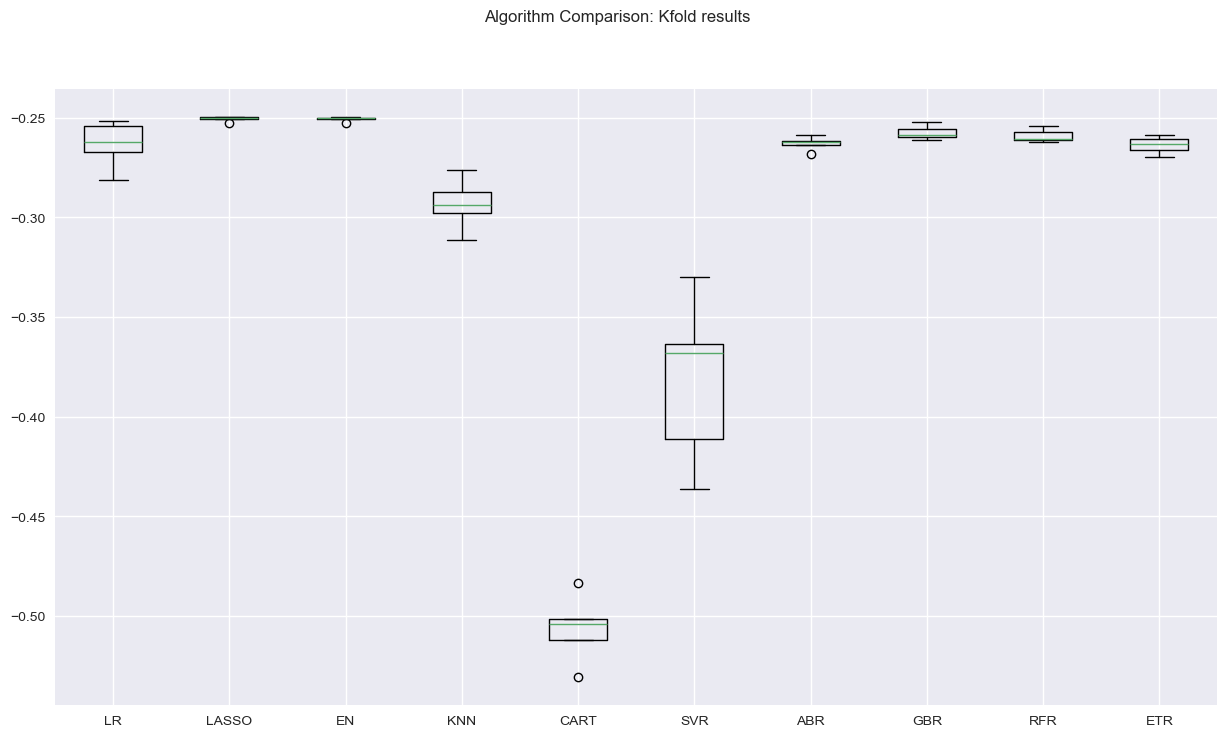

In [55]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

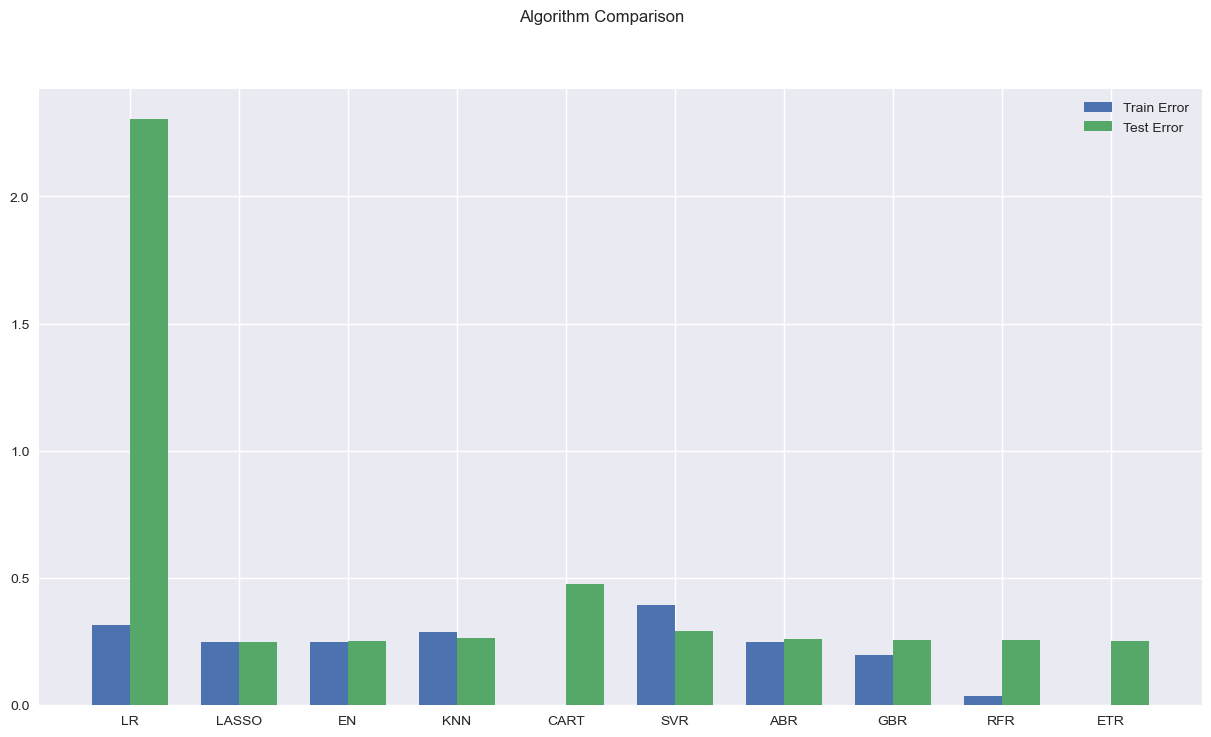

In [56]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [57]:
X_train_ARIMA=X_train.loc[:, ['LQD', 'HangSeng', 'BND']]
X_test_ARIMA=X_test.loc[:, ['LQD', 'HangSeng', 'BND']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [58]:
from statsmodels.tsa.arima.model import ARIMA  # <-- updated path

modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=(1,0,0))
model_fit = modelARIMA.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Direction   No. Observations:                 3176
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2300.280
Date:                Wed, 05 Nov 2025   AIC                           4612.560
Time:                        01:03:10   BIC                           4648.941
Sample:                             0   HQIC                          4625.608
                               - 3176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5096      0.022     22.936      0.000       0.466       0.553
LQD            6.8433     15.550      0.440      0.660     -23.634      37.321
HangSeng       0.9531      2.146      0.444      0.6

In [59]:
from sklearn.metrics import mean_squared_error

# Align test features to train features
X_test_ARIMA = X_test_ARIMA[X_train_ARIMA.columns]

# Train the model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=Y_train, exog=X_train_ARIMA, order=(1, 1, 0))
model_fit = model.fit(disp=False)

# Compute training error
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

# Predict
predicted = model_fit.predict(
    start=len(Y_train),
    end=len(Y_train) + len(Y_test) - 1,
    exog=X_test_ARIMA
)

# Compute test error
error_Test_ARIMA = mean_squared_error(Y_test, predicted)
print("Training MSE:", error_Training_ARIMA)
print("Test MSE:", error_Test_ARIMA)

Training MSE: 0.37551539224781527
Test MSE: 0.30086503331809095


In [60]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.30086503331809095